<a href="https://colab.research.google.com/github/ibonetc/Finance_ML/blob/main/ML_Finance_ExampleClassification_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de uso de pycaret

Vamos a usar la base de datos de UCI llamada [Default of Credit Card Clientes Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

El conjunto de datos de clientes de tarjetas de crédito predeterminados. Este conjunto de datos contiene información sobre pagos predeterminados, factores demográficos, datos crediticios, historial de pagos y extractos de facturación de clientes de tarjetas de crédito en Taiwán desde abril de 2005 hasta septiembre de 2005. Hay 24.000 muestras y 25 características. Las descripciones breves de cada columna son las siguientes:


*   DNI: DNI de cada cliente
*   LIMIT_BAL: monto del crédito otorgado en dólares NT (incluye crédito individual y familiar/suplementario)
*   SEXO: Género (1=masculino, 2=femenino)
*   EDUCACIÓN: (1=graduado, 2=universidad, 3=bachillerato, 4=otros, 5=desconocido, 6=desconocido)
*   MATRIMONIO: Estado civil (1=casado, 2=soltero, 3=otros)
*   EDAD: Edad en años
*   PAY_0 a PAY_6: estado de pago hace n meses (PAY_0 = último mes... PAY_6 = hace 6 meses) (Etiquetas: -1=pago debidamente, 1=retraso en el pago de un mes, 2=retraso en el pago de dos meses,... 8= retraso en el pago de ocho meses, 9 = retraso en el pago de nueve meses o más)
*   BILL_AMT1 a BILL_AMT6: Importe del estado de cuenta de hace n meses ( BILL_AMT1 = último_mes .. BILL_AMT6 = hace 6 meses)
*   PAY_AMT1 a PAY_AMT6: Monto de pago por n meses atrás ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 meses atrás)
*   predeterminado: Pago predeterminado (1=sí, 0=no) Columna objetivo

In [ ]:
!pip install pycaret

In [ ]:
!pip install explainerdashboard

In [ ]:
!pip install autoviz

In [2]:
!pip install markupsafe==2.0.1
import jinja2

In [3]:
from pycaret.utils import enable_colab
enable_colab

<function pycaret.utils.enable_colab>

In [4]:
from pycaret.datasets import get_data
dataset = get_data('credit')

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1      90000    2          2         2   34      0      0      0      0   
2      50000    2          2         1   37      0      0      0      0   
3      50000    1          2         1   57     -1      0     -1      0   
4      50000    1          1         2   37      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
2      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
3      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
4      0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        1  
1    1000.0    1000.0    5000.0        0  
2    1100.0    1069.0    1000.0        0  
3    9000.0     689.0     679.0        0  
4    1000.0    1000.0     800.0        0  

[5 rows x 24 columns]

## División de los datos en entrenamiento y prueba
Escogeremos un 15% de los datos para prueba

In [5]:
data = dataset.sample(frac=0.95, random_state=7)
validation_data = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
validation_data.reset_index(inplace=True, drop=True)

In [5]:
data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          50000    1          2         1   34      0      0      0      0   
1         440000    1          1         1   37     -1     -1     -1     -1   
2         110000    2          1         1   37     -1     -1      0      0   
3         200000    1          3         1   36     -1      2     -1      0   
4          50000    1          2         1   49      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
22795     230000    2          2         1   34      0     -1     -1     -1   
22796     180000    1          2         2   33      0      0      0      0   
22797      50000    1          2         1   35     -1      2      0      0   
22798      20000    2          2         1   29      0      0      0      0   
22799     500000    1          1         2   36     -2     -2     -2     -2   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          0  ...    14234.0    19545.0    20173.0    2023.0    3105.0   
1         -1  ...      396.0      600.0     3596.0    8369.0   16786.0   
2          0  ...    50418.0    48093.0     3389.0   54300.0    6600.0   
3          0  ...    28367.0    28721.0    20139.0       4.0   24846.0   
4          0  ...    37192.0    39341.0    27561.0    2000.0    3500.0   
...      ...  ...        ...        ...        ...       ...       ...   
22795     -1  ...     2350.0   103030.0      380.0     380.0     380.0   
22796      0  ...   111065.0   122028.0   125069.0    4100.0    4400.0   
22797      0  ...    16884.0    18070.0    19218.0       0.0    2100.0   
22798      0  ...     8472.0     8640.0     8971.0    1268.0    1284.0   
22799     -2  ...    27229.0    21462.0    27911.0   81690.0   18225.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0        3119.0   11000.0     909.0    3000.0        0  
1         396.0     600.0    3596.0    4095.0        0  
2         400.0    4000.0    1771.0       0.0        1  
3        5004.0    1540.0       4.0    6411.0        1  
4        3000.0    3000.0    5000.0    5000.0        1  
...         ...       ...       ...       ...      ...  
22795    2350.0  103030.0     380.0    1570.0        0  
22796   10000.0   12900.0    5000.0    5000.0        0  
22797    2000.0    2000.0    2000.0    2000.0        1  
22798    1141.0     309.0     470.0     321.0        1  
22799   27365.0   21570.0   28050.0   17397.0        1  

[22800 rows x 24 columns]

In [6]:
dataset.shape

(24000, 24)

In [7]:
data.shape

(22800, 24)

In [8]:
validation_data.shape

(1200, 24)

In [7]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [8]:
s = setup(data = data, target = 'default', session_id=7,train_size=0.75)

Description             Value
0                               session_id                 7
1                                   Target           default
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data       (22800, 24)
5                           Missing Values             False
6                         Numeric Features                14
7                     Categorical Features                 9
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (17100, 87)
12                    Transformed Test Set        (5700, 87)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              515a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

## Modelos que trae el paquete

In [11]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

## Crear un modelo de Regresión Logística

In [9]:
logit = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7825  0.6445  0.0027  1.0000  0.0053  0.0042  0.0458
1       0.7807  0.6549  0.0000  0.0000  0.0000 -0.0012 -0.0128
2       0.7813  0.6493  0.0000  0.0000  0.0000  0.0000  0.0000
3       0.7819  0.6524  0.0027  1.0000  0.0053  0.0042  0.0457
4       0.7819  0.6620  0.0027  1.0000  0.0053  0.0042  0.0457
5       0.7807  0.6197  0.0000  0.0000  0.0000 -0.0012 -0.0128
6       0.7813  0.6366  0.0000  0.0000  0.0000  0.0000  0.0000
7       0.7813  0.6519  0.0000  0.0000  0.0000  0.0000  0.0000
8       0.7807  0.6233  0.0000  0.0000  0.0000 -0.0012 -0.0128
9       0.7813  0.6621  0.0000  0.0000  0.0000  0.0000  0.0000
Mean    0.7813  0.6457  0.0008  0.3000  0.0016  0.0009  0.0099
Std     0.0006  0.0141  0.0012  0.4583  0.0024  0.0022  0.0241

El modelo entrenado es almacenado en la variable logit

In [9]:
print(logit)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Visualizar resultados
### Gráfica de entrenamiento

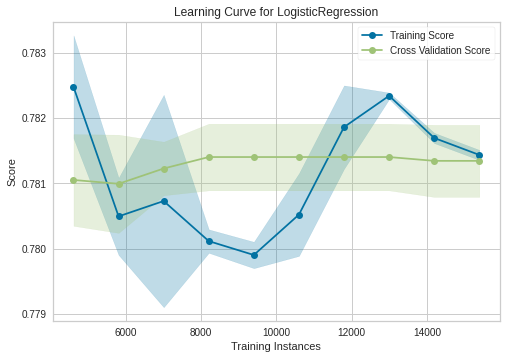

In [14]:
plot_model(logit, plot = 'learning', use_train_data = True)

### Gráfrica de error

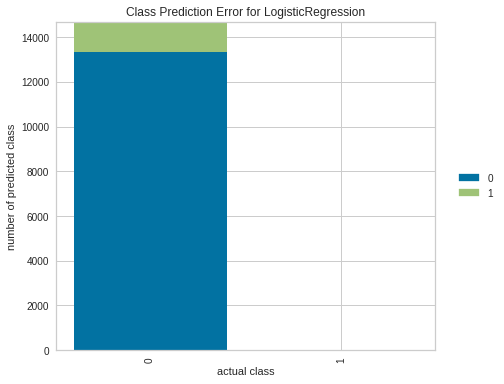

In [15]:
plot_model(logit, plot = 'error', use_train_data = True)

### Matriz de confusion

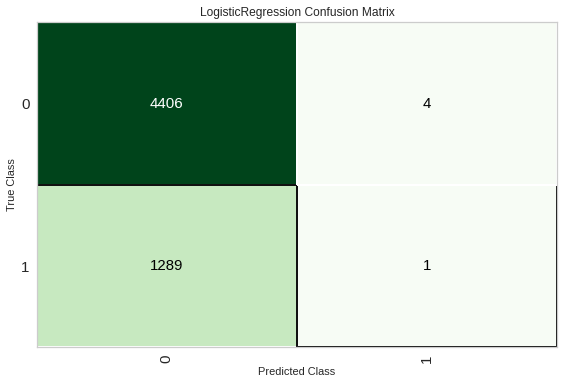

In [16]:
plot_model(logit , plot = 'confusion_matrix')

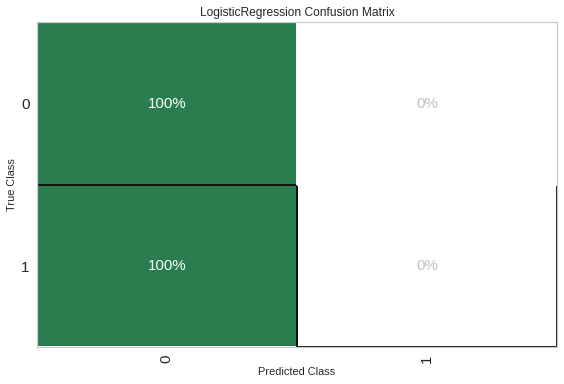

In [17]:
plot_model(logit , plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

## Dashboard

Con este dashboard en http://127.0.0.1:8050/ se puede ver resultados explicativos, como la importancia de los rasgos en el modelo, métricas del modelo resumidas, predicciones individuales

In [10]:
from dash import html
from dash import dcc

In [11]:
dashboard(logit)

Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation 

<IPython.core.display.Javascript object>

In [21]:
%matplotlib inline
eda()

Shape of your Data Set loaded: (22800, 24)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    23 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
Not able to read or load file. Please check your inputs and try again...


## Crear un modelo Árbol de Desición

In [12]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7304  0.6212  0.4263  0.3916  0.4082  0.2341  0.2344
1       0.7298  0.6211  0.4278  0.3922  0.4092  0.2345  0.2349
2       0.7269  0.6057  0.3904  0.3792  0.3847  0.2093  0.2093
3       0.7409  0.6349  0.4439  0.4140  0.4284  0.2612  0.2614
4       0.7199  0.5991  0.3850  0.3664  0.3755  0.1951  0.1952
5       0.7304  0.6099  0.3957  0.3864  0.3910  0.2179  0.2180
6       0.7216  0.6044  0.3930  0.3712  0.3818  0.2024  0.2025
7       0.7246  0.6129  0.4144  0.3808  0.3969  0.2189  0.2192
8       0.7374  0.6130  0.3930  0.3984  0.3957  0.2280  0.2280
9       0.7269  0.6171  0.4225  0.3863  0.4036  0.2269  0.2273
Mean    0.7289  0.6139  0.4092  0.3867  0.3975  0.2228  0.2230
Std     0.0062  0.0097  0.0192  0.0129  0.0148  0.0179  0.0179

In [13]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')


## Predecir con el modelo

In [14]:
predict_model(dt);

Model  Accuracy     AUC  Recall  Prec.      F1   Kappa  \
0  Decision Tree Classifier    0.7096  0.5998  0.3984  0.369  0.3832  0.1937   

      MCC  
0  0.1939

## Entrenar el modelo con todos los datos

In [15]:
final_dt = finalize_model(dt)

## Probar el modelo con los datos de validación

In [16]:
validation_predictions = predict_model(final_dt, data=validation_data)
validation_predictions.head()

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Decision Tree Classifier    0.7192  0.6036  0.3899  0.3913  0.3906  0.2081   

      MCC  
0  0.2081

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0     360000    2          1         2   26      0      0      0      0   
1     360000    1          2         1   35      1     -2     -2     -2   
2      50000    2          2         2   22     -1      0      0      0   
3     100000    2          2         1   38      1      2      0      0   
4     210000    2          2         1   41     -1     -1     -1     -1   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...      196.0    4796.0    3400.0    3100.0  146900.0     196.0   
1     -2  ...     -103.0       0.0       0.0       0.0       0.0       0.0   
2      0  ...     7725.0   15000.0    1000.0     149.0       0.0    5000.0   
3      2  ...    16448.0       0.0    1600.0    1500.0       0.0    1000.0   
4     -1  ...        0.0    1586.0     343.0    3763.0     877.0       0.0   

   PAY_AMT6  default  Label  Score  
0    2963.0        0      0    1.0  
1       0.0        0      0    1.0  
2   10000.0        0      0    1.0  
3    1500.0        1      0    1.0  
4     419.0        1      0    1.0  

[5 rows x 26 columns]

## Guardar el modelo

In [17]:
save_model(dt,'DT_Credit_30Abril2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                        

## Cargando el modelo

Se debe poner sin la extención .pkl

In [18]:
saved_final_dt=load_model('/content/DT_Credit_30Abril2021')

Transformation Pipeline and Model Successfully Loaded


In [19]:
new_prediction = predict_model(saved_final_dt, data=validation_data)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Decision Tree Classifier    0.7175  0.6041  0.3935  0.3893  0.3914  0.2075   

      MCC  
0  0.2075

In [20]:
new_prediction.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0     360000    2          1         2   26      0      0      0      0   
1     360000    1          2         1   35      1     -2     -2     -2   
2      50000    2          2         2   22     -1      0      0      0   
3     100000    2          2         1   38      1      2      0      0   
4     210000    2          2         1   41     -1     -1     -1     -1   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...      196.0    4796.0    3400.0    3100.0  146900.0     196.0   
1     -2  ...     -103.0       0.0       0.0       0.0       0.0       0.0   
2      0  ...     7725.0   15000.0    1000.0     149.0       0.0    5000.0   
3      2  ...    16448.0       0.0    1600.0    1500.0       0.0    1000.0   
4     -1  ...        0.0    1586.0     343.0    3763.0     877.0       0.0   

   PAY_AMT6  default  Label  Score  
0    2963.0        0      1    1.0  
1       0.0        0      0    1.0  
2   10000.0        0      1    1.0  
3    1500.0        1      0    1.0  
4     419.0        1      0    1.0  

[5 rows x 26 columns]

Vea que los resultados son los mismo, lo que verifica que el modelo se guardó correctamente

In [21]:
from pycaret.utils import check_metric
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')

0.7175

## Ajustar los parámetros de un modelo

Cuando usamos la función create_model usa los parámetros por defecto, si queremos cambiarlos tenemos que usar la función tune_model. 

Esta función automáticamente hace una búsqueda de los mejores hiperparámetros del modelo.

In [22]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8170  0.7399  0.3753  0.6364  0.4722  0.3703  0.3891
1       0.8140  0.7484  0.3583  0.6321  0.4573  0.3553  0.3762
2       0.8146  0.7339  0.3235  0.6541  0.4329  0.3369  0.3668
3       0.8099  0.7334  0.3503  0.6150  0.4463  0.3419  0.3616
4       0.7942  0.7263  0.3102  0.5524  0.3973  0.2848  0.3020
5       0.7982  0.7118  0.3503  0.5622  0.4316  0.3169  0.3301
6       0.8193  0.7224  0.3743  0.6512  0.4754  0.3757  0.3967
7       0.8158  0.7178  0.3476  0.6468  0.4522  0.3533  0.3779
8       0.8041  0.7246  0.3075  0.6021  0.4071  0.3042  0.3289
9       0.8216  0.7490  0.3422  0.6845  0.4563  0.3635  0.3948
Mean    0.8109  0.7308  0.3440  0.6237  0.4429  0.3403  0.3624
Std     0.0087  0.0118  0.0226  0.0394  0.0245  0.0283  0.0304

In [23]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')


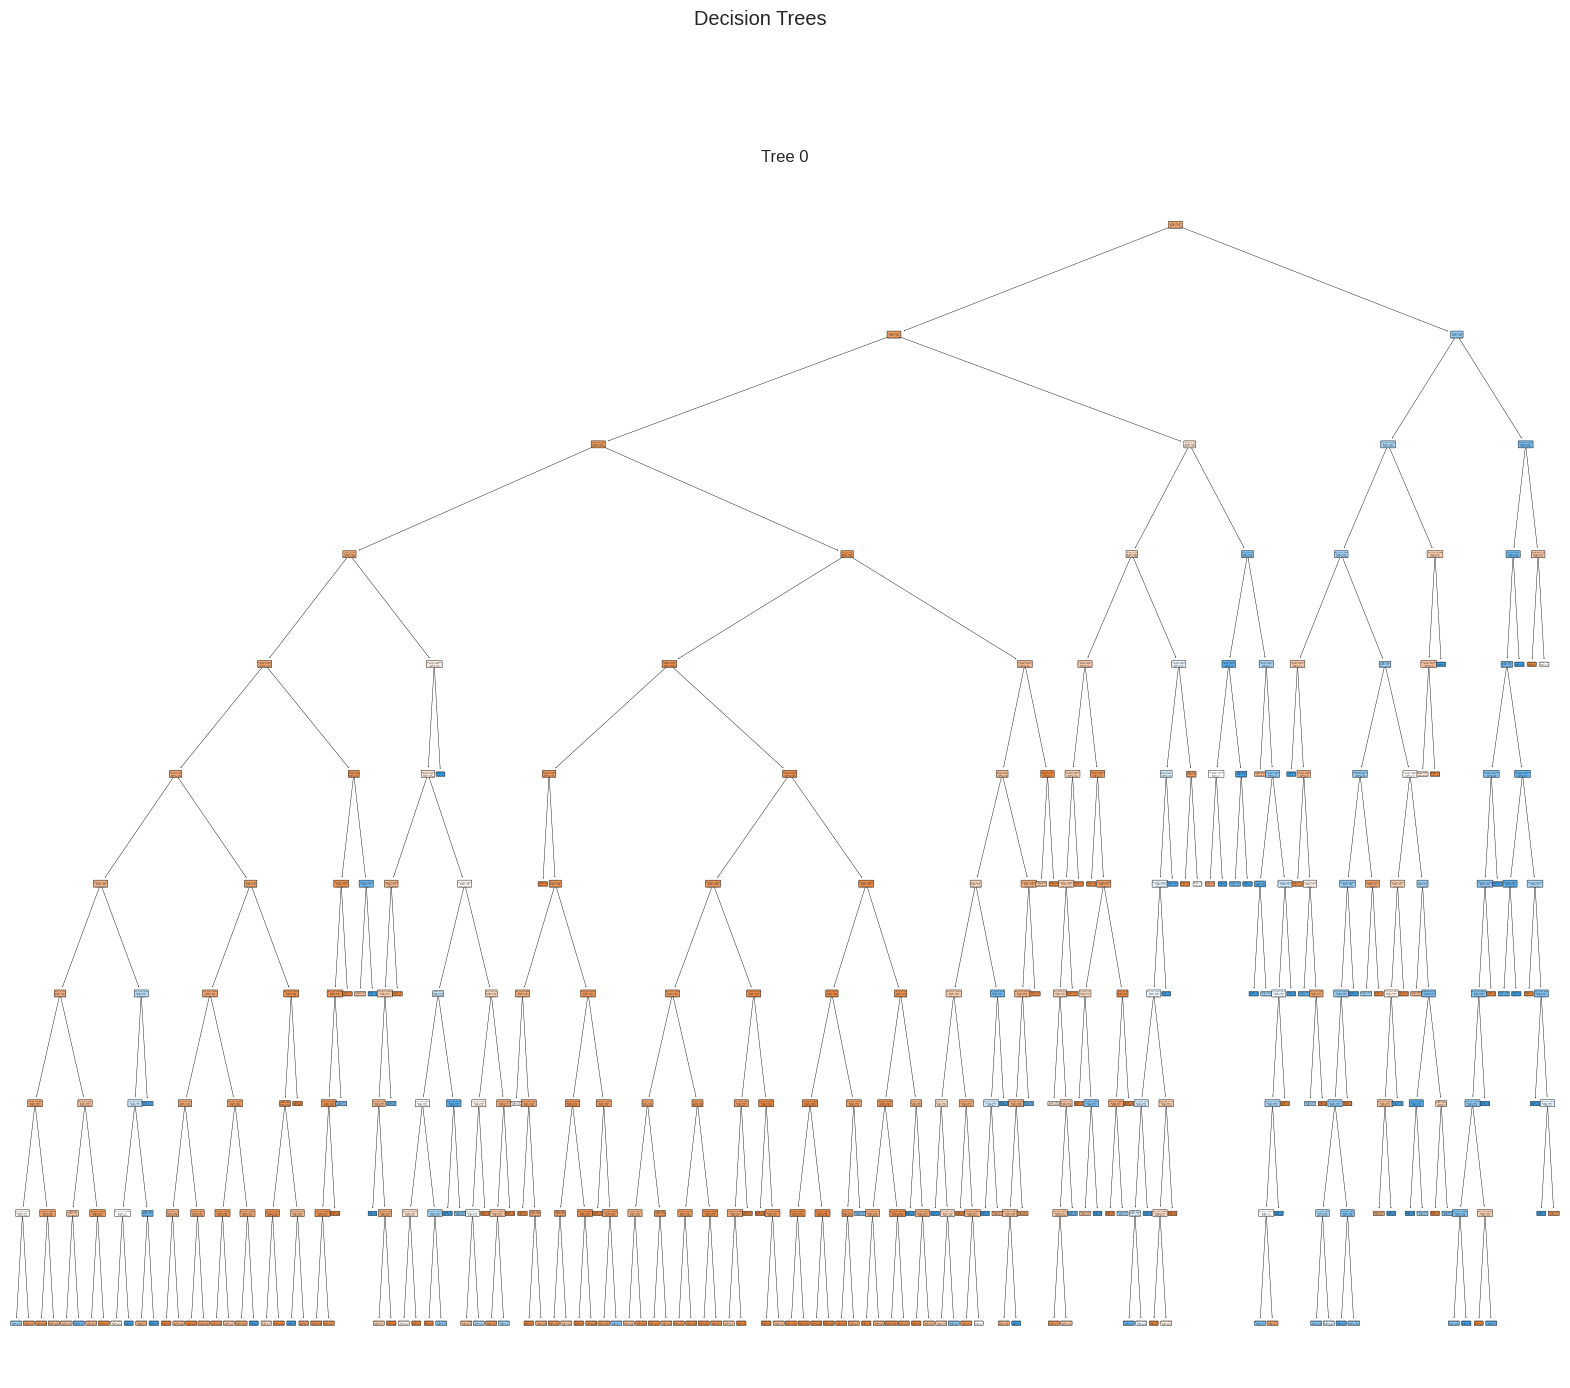

In [24]:
plot_model(tuned_dt,plot='tree');

In [25]:
import graphviz
from sklearn import tree

In [26]:
classes=dt.classes_
classes=classes.astype(str)

In [27]:
classes

array(['0', '1'], dtype='<U21')

In [28]:
graphviz.Source(tree.export_graphviz(dt,out_file=None,
                                             feature_names=list(get_config('X_train').columns),
                                             class_names=classes,filled=True,rounded=True)
)

## Crear un KNN

In [29]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7509  0.5953  0.1609  0.3468  0.2198  0.0946  0.1045
1       0.7433  0.5933  0.1551  0.3204  0.2090  0.0774  0.0847
2       0.7474  0.5925  0.1604  0.3371  0.2174  0.0889  0.0976
3       0.7585  0.6146  0.1979  0.3957  0.2638  0.1381  0.1500
4       0.7632  0.6291  0.1791  0.4061  0.2486  0.1324  0.1481
5       0.7556  0.6049  0.1711  0.3721  0.2344  0.1121  0.1241
6       0.7520  0.6017  0.1765  0.3626  0.2374  0.1100  0.1202
7       0.7620  0.5995  0.1738  0.3988  0.2421  0.1260  0.1414
8       0.7409  0.5845  0.1444  0.3051  0.1960  0.0646  0.0710
9       0.7567  0.6260  0.1818  0.3820  0.2464  0.1226  0.1347
Mean    0.7530  0.6041  0.1701  0.3627  0.2315  0.1067  0.1176
Std     0.0072  0.0140  0.0145  0.0328  0.0195  0.0233  0.0259

### Ajustando los parámetros del knn
Cuando queremos buscar entre un conjunto de parámetros podemos especificar el atributo y el rango a buscar.

Por ejemplo, buscar la k de del knn (n_neighbors) entre 1 y 50

In [30]:
np.arange(1,51,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [31]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(1,51,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7860  0.6592  0.0483  0.6207  0.0896  0.0600  0.1280
1       0.7801  0.6615  0.0428  0.4706  0.0784  0.0436  0.0868
2       0.7789  0.6369  0.0428  0.4444  0.0780  0.0412  0.0801
3       0.7871  0.6957  0.0668  0.6250  0.1208  0.0820  0.1521
4       0.7813  0.6702  0.0428  0.5000  0.0788  0.0459  0.0940
5       0.7772  0.6258  0.0374  0.4000  0.0685  0.0322  0.0634
6       0.7795  0.6344  0.0428  0.4571  0.0782  0.0424  0.0834
7       0.7836  0.6459  0.0455  0.5667  0.0842  0.0534  0.1125
8       0.7836  0.6303  0.0508  0.5588  0.0931  0.0588  0.1172
9       0.7830  0.6735  0.0615  0.5349  0.1103  0.0683  0.1228
Mean    0.7820  0.6533  0.0481  0.5178  0.0880  0.0528  0.1040
Std     0.0030  0.0214  0.0088  0.0721  0.0154  0.0141  0.0256

In [32]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=48, p=2,
                     weights='uniform')


In [33]:
plot_model(tuned_knn, plot = 'parameter')

Parameters
algorithm           auto
leaf_size             30
metric         minkowski
metric_params       None
n_jobs                -1
n_neighbors           48
p                      2
weights          uniform

## Calibrar modelo según probabilidades
Al realizar la clasificación, a menudo no sólo desea predecir la etiqueta de clase (resultado como 0 o 1), sino también obtener la probabilidad del resultado respectivo que proporciona un nivel de confianza en la predicción. Algunos modelos pueden brindar estimaciones deficientes de las probabilidades de clase y algunos ni siquiera admiten la predicción de probabilidad. Los clasificadores bien calibrados son probabilísticos y proporcionan resultados en forma de probabilidades que pueden interpretarse directamente como un nivel de confianza. PyCaret le permite calibrar las probabilidades de un modelo dado a través de la función calibrate_model(). Vea un ejemplo a continuación:

In [34]:
dt=create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7304  0.6212  0.4263  0.3916  0.4082  0.2341  0.2344
1       0.7298  0.6211  0.4278  0.3922  0.4092  0.2345  0.2349
2       0.7269  0.6057  0.3904  0.3792  0.3847  0.2093  0.2093
3       0.7409  0.6349  0.4439  0.4140  0.4284  0.2612  0.2614
4       0.7199  0.5991  0.3850  0.3664  0.3755  0.1951  0.1952
5       0.7304  0.6099  0.3957  0.3864  0.3910  0.2179  0.2180
6       0.7216  0.6044  0.3930  0.3712  0.3818  0.2024  0.2025
7       0.7246  0.6129  0.4144  0.3808  0.3969  0.2189  0.2192
8       0.7374  0.6130  0.3930  0.3984  0.3957  0.2280  0.2280
9       0.7269  0.6171  0.4225  0.3863  0.4036  0.2269  0.2273
Mean    0.7289  0.6139  0.4092  0.3867  0.3975  0.2228  0.2230
Std     0.0062  0.0097  0.0192  0.0129  0.0148  0.0179  0.0179

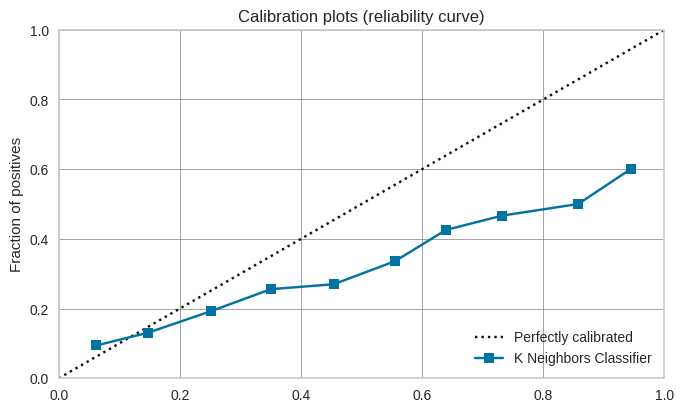

In [35]:
plot_model(tuned_knn, plot='calibration')

In [36]:
calibrated_knn = calibrate_model(tuned_knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7848  0.6601  0.0322  0.6316  0.0612  0.0409  0.1061
1       0.7789  0.6695  0.0241  0.4091  0.0455  0.0217  0.0526
2       0.7825  0.6379  0.0294  0.5500  0.0558  0.0344  0.0872
3       0.7848  0.6988  0.0267  0.7143  0.0515  0.0363  0.1089
4       0.7842  0.6651  0.0267  0.6667  0.0514  0.0351  0.1019
5       0.7801  0.6332  0.0267  0.4545  0.0505  0.0269  0.0651
6       0.7819  0.6381  0.0241  0.5294  0.0460  0.0275  0.0753
7       0.7830  0.6495  0.0321  0.5714  0.0608  0.0384  0.0951
8       0.7830  0.6337  0.0321  0.5714  0.0608  0.0384  0.0951
9       0.7860  0.6813  0.0348  0.7222  0.0663  0.0472  0.1256
Mean    0.7829  0.6567  0.0289  0.5821  0.0550  0.0347  0.0913
Std     0.0021  0.0211  0.0036  0.0985  0.0067  0.0071  0.0208

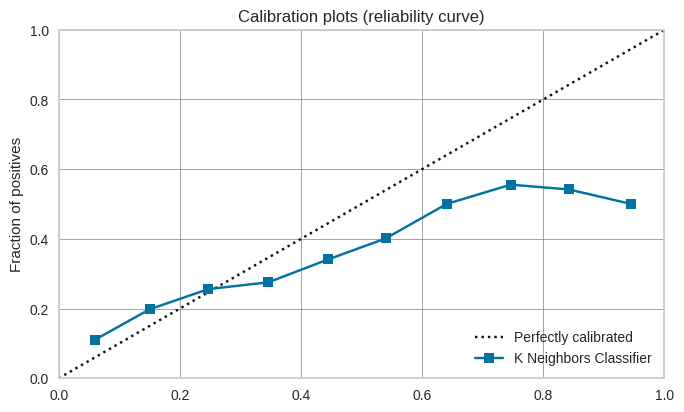

In [37]:
plot_model(calibrated_knn, plot='calibration')

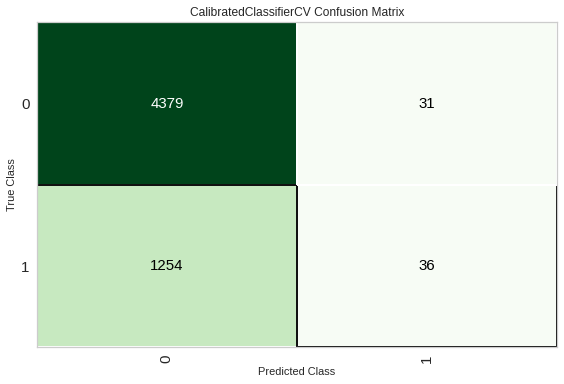

In [38]:
plot_model(calibrated_knn, plot='confusion_matrix')

In [39]:
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.8230  0.7659  0.3771  0.6694   
ridge                    Ridge Classifier    0.8226  0.0000  0.3600  0.6775   
lightgbm  Light Gradient Boosting Machine    0.8223  0.7785  0.3787  0.6646   
gbc          Gradient Boosting Classifier    0.8219  0.7829  0.3589  0.6750   
ada                  Ada Boost Classifier    0.8181  0.7726  0.3338  0.6678   
rf               Random Forest Classifier    0.8179  0.7636  0.3667  0.6476   
et                 Extra Trees Classifier    0.8093  0.7407  0.3742  0.6030   
lr                    Logistic Regression    0.7813  0.6457  0.0008  0.3000   
dummy                    Dummy Classifier    0.7813  0.5000  0.0000  0.0000   
knn                K Neighbors Classifier    0.7530  0.6041  0.1701  0.3627   
dt               Decision Tree Classifier    0.7289  0.6139  0.4092  0.3867   
svm                   SVM - Linear Kernel    0.6867  0.0000  0.2414  0.2326   
qda       Quadratic Discriminant Analysis    0.5359  0.5455  0.5627  0.2605   
nb                            Naive Bayes    0.3691  0.6373  0.8738  0.2405   

              F1   Kappa     MCC  TT (Sec)  
lda       0.4823  0.3855  0.4086     0.200  
ridge     0.4700  0.3753  0.4024     0.058  
lightgbm  0.4823  0.3847  0.4070     0.536  
gbc       0.4685  0.3733  0.4003     5.257  
ada       0.4449  0.3504  0.3806     1.083  
rf        0.4680  0.3682  0.3900     2.637  
et        0.4616  0.3535  0.3684     2.089  
lr        0.0016  0.0009  0.0099     0.764  
dummy     0.0000  0.0000  0.0000     0.042  
knn       0.2315  0.1067  0.1176     0.878  
dt        0.3975  0.2228  0.2230     0.340  
svm       0.1674  0.0527  0.0578     0.530  
qda       0.3426  0.0702  0.0803     0.101  
nb        0.3772  0.0522  0.1040     0.038

In [40]:
s2=setup(data = data, target = 'default', session_id=7,train_size=0.75, fix_imbalance = True)

Description             Value
0                               session_id                 7
1                                   Target           default
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data       (22800, 24)
5                           Missing Values             False
6                         Numeric Features                14
7                     Categorical Features                 9
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (17100, 87)
12                    Transformed Test Set        (5700, 87)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              12f7
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance              True
59                    Fix Imbalance Method             SMOTE

In [41]:
best_balanceM = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.8221  0.7783  0.3728  0.6670   
lightgbm  Light Gradient Boosting Machine    0.8216  0.7760  0.3843  0.6578   
ada                  Ada Boost Classifier    0.8212  0.7669  0.3875  0.6548   
rf               Random Forest Classifier    0.8171  0.7621  0.3942  0.6309   
et                 Extra Trees Classifier    0.8088  0.7408  0.3870  0.5969   
ridge                    Ridge Classifier    0.7827  0.0000  0.5584  0.5032   
lda          Linear Discriminant Analysis    0.7827  0.7646  0.5576  0.5031   
dummy                    Dummy Classifier    0.7813  0.5000  0.0000  0.0000   
dt               Decision Tree Classifier    0.7226  0.6117  0.4143  0.3777   
knn                K Neighbors Classifier    0.6030  0.6028  0.5325  0.2832   
svm                   SVM - Linear Kernel    0.5751  0.0000  0.4594  0.1772   
lr                    Logistic Regression    0.5587  0.6622  0.7232  0.2933   
nb                            Naive Bayes    0.3319  0.6338  0.9152  0.2355   
qda       Quadratic Discriminant Analysis    0.2189  0.4996  0.9984  0.2185   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.4782  0.3811  0.4047    10.233  
lightgbm  0.4850  0.3860  0.4065     0.926  
ada       0.4865  0.3868  0.4065     2.319  
rf        0.4851  0.3811  0.3967     3.871  
et        0.4693  0.3592  0.3719     3.654  
ridge     0.5292  0.3885  0.3896     0.230  
lda       0.5287  0.3881  0.3891     0.518  
dummy     0.0000  0.0000  0.0000     0.200  
dt        0.3950  0.2156  0.2160     0.570  
knn       0.3696  0.1178  0.1304     1.311  
svm       0.2408  0.0448  0.0651     1.271  
lr        0.4174  0.1543  0.1956     1.752  
nb        0.3747  0.0412  0.0970     0.234  
qda       0.3586 -0.0003 -0.0069     0.325

In [42]:
lda=create_model('lda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7877  0.7530  0.5576  0.5123  0.5340  0.3969  0.3975
1       0.7982  0.7718  0.5882  0.5353  0.5605  0.4300  0.4308
2       0.7906  0.7765  0.5428  0.5205  0.5314  0.3967  0.3968
3       0.7743  0.7675  0.5535  0.4859  0.5175  0.3710  0.3723
4       0.7801  0.7595  0.5668  0.4977  0.5300  0.3873  0.3887
5       0.7713  0.7584  0.5642  0.4806  0.5191  0.3703  0.3724
6       0.7801  0.7753  0.5775  0.4977  0.5347  0.3917  0.3936
7       0.7877  0.7516  0.5294  0.5143  0.5217  0.3854  0.3854
8       0.7690  0.7521  0.5107  0.4739  0.4916  0.3425  0.3429
9       0.7877  0.7802  0.5856  0.5129  0.5468  0.4090  0.4105
Mean    0.7827  0.7646  0.5576  0.5031  0.5287  0.3881  0.3891
Std     0.0088  0.0104  0.0234  0.0183  0.0175  0.0225  0.0225

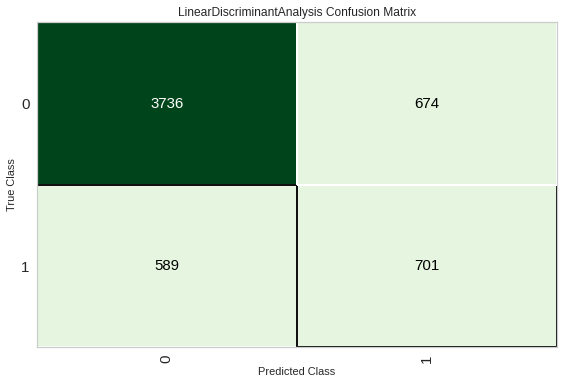

In [43]:
plot_model(lda,plot='confusion_matrix')

In [44]:
gbc=create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8304  0.7837  0.4048  0.6895  0.5101  0.4159  0.4374
1       0.8263  0.7942  0.3717  0.6915  0.4835  0.3902  0.4175
2       0.8257  0.7785  0.3663  0.6919  0.4790  0.3861  0.4143
3       0.8240  0.7821  0.3904  0.6667  0.4924  0.3946  0.4153
4       0.8099  0.7718  0.3529  0.6140  0.4482  0.3434  0.3626
5       0.8123  0.7666  0.3583  0.6233  0.4550  0.3515  0.3711
6       0.8287  0.7900  0.3904  0.6919  0.4991  0.4053  0.4295
7       0.8222  0.7643  0.3610  0.6750  0.4704  0.3751  0.4017
8       0.8140  0.7643  0.3476  0.6373  0.4498  0.3494  0.3726
9       0.8275  0.7880  0.3850  0.6890  0.4940  0.3999  0.4245
Mean    0.8221  0.7783  0.3728  0.6670  0.4782  0.3811  0.4047
Std     0.0070  0.0105  0.0179  0.0292  0.0206  0.0240  0.0253

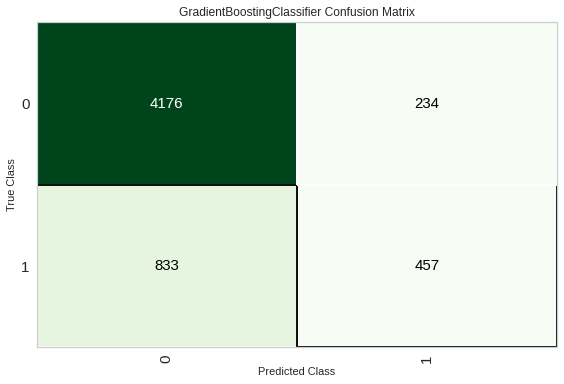

In [46]:
plot_model(gbc,plot='confusion_matrix')